In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.animation import FuncAnimation, FFMpegWriter

In [ ]:
# 讀取實測檔案
df_measured = pd.read_csv('./Data/combined_250423.csv')
df_measured['deltaB'] = 2 * df_measured['B_max(mT)']
df_measured['source'] = 'Measured'
df_measured = df_measured.rename(columns={'Hdc(A/m)': 'Hdc'})
df_measured = df_measured[['Duty_P', 'Hdc', 'deltaB', 'source']]

# 理論檔案清單
theory_files = {
    'Vinmin': './Data/PFC_Vinmin_Duty_Bac_Hdc.csv',
    'Vinmax': './Data/PFC_Vinmax_Duty_Bac_Hdc.csv',
    'Vin110': './Data/PFC_Vin110_Duty_Bac_Hdc.csv',
    'Vin220': './Data/PFC_Vin220_Duty_Bac_Hdc.csv',
}

# 讀取所有理論檔案並整理格式
df_theory_all = []

for label, filename in theory_files.items():
    df = pd.read_csv(filename)
    df['deltaB'] = df['Bac_mT']
    df['source'] = label
    df = df.rename(columns={'Duty': 'Duty_P', 'Hdc_Am': 'Hdc'})
    df = df[['Duty_P', 'Hdc', 'deltaB', 'source']]
    df_theory_all.append(df)

# 合併所有資料
df_all = pd.concat([*df_theory_all, df_measured], ignore_index=True)


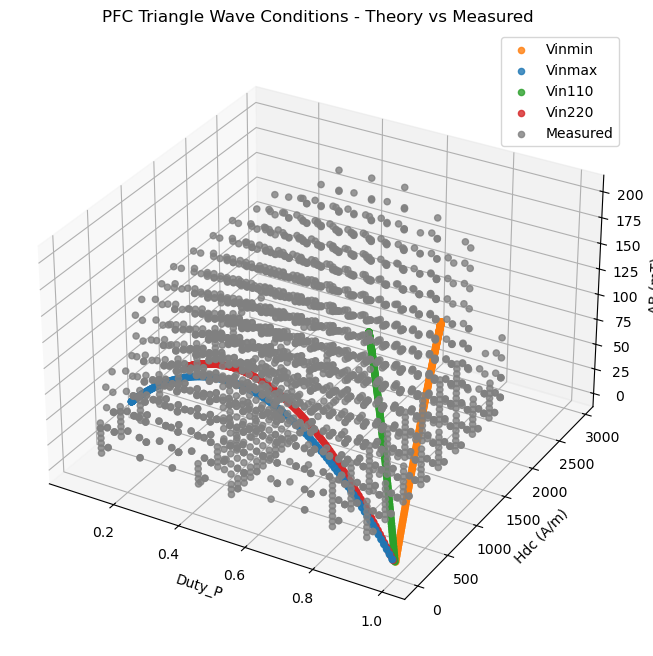

In [ ]:
# 建立圖形與軸
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1.5, 1.5, 1])  # Y 軸拉長一點

# 指定顏色
color_cycle = {
    'Vinmax': 'C0',
    'Vinmin': 'C1',
    'Vin110': 'C2',
    'Vin220': 'C3',
    'Measured': 'gray'
}

# 畫所有資料點
for label in df_all['source'].unique():
    df_plot = df_all[df_all['source'] == label]
    ax.scatter(df_plot['Duty_P'],
               df_plot['Hdc'],
               df_plot['deltaB'],
               label=label,
               color=color_cycle[label],
               alpha=0.8)

# 標籤與標題
ax.set_xlabel('Duty_P')
ax.set_ylabel('Hdc (A/m)')
ax.set_zlabel('ΔB (mT)')
ax.set_title('PFC Triangle Wave Conditions - Theory vs Measured')
ax.legend()


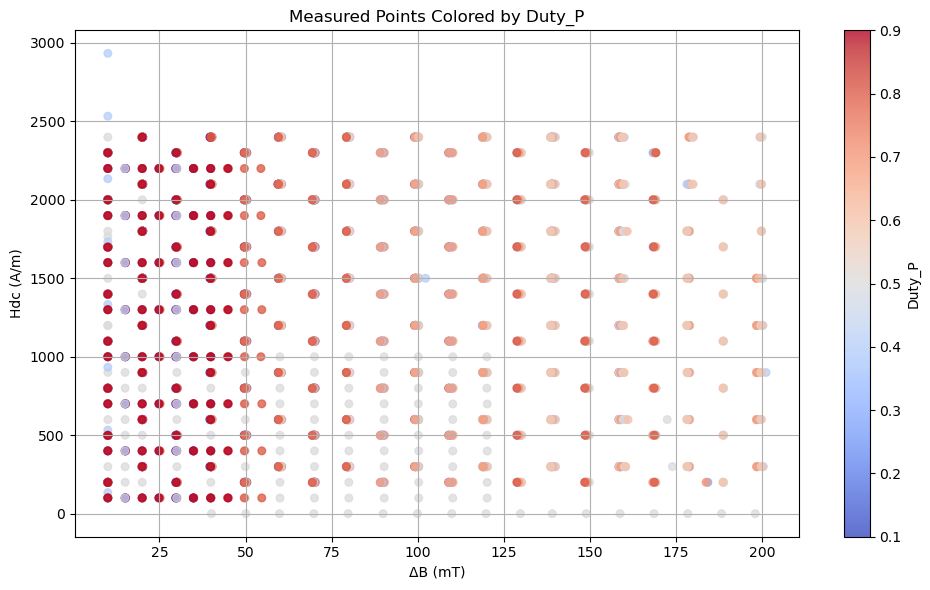

In [ ]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    df_measured['deltaB'],  # X 軸：ΔB
    df_measured['Hdc'],  # Y 軸：Hdc
    c=df_measured['Duty_P'],  # 顏色表示 Duty_P 值
    cmap='coolwarm',  # 彩虹顏色
    s=30,  # 點大小
    alpha=0.8
    # edgecolor='k'
)

plt.xlabel('ΔB (mT)')
plt.ylabel('Hdc (A/m)')
plt.title('Measured Points Colored by Duty_P')
cbar = plt.colorbar(sc)
cbar.set_label('Duty_P')
plt.grid(True)
plt.tight_layout()
plt.show()


In [162]:
# 動畫函式：每一幀旋轉視角
def update(frame):
    ax.view_init(elev=30, azim=frame)


# 產生動畫
ani = FuncAnimation(fig, update, frames=range(0, 360, 5), interval=100)

# 輸出為 GIF
ani.save('pfc_all_conditions.gif', writer=PillowWriter(fps=10))

print("✅ GIF 輸出完成：pfc_all_conditions.gif")


✅ GIF 輸出完成：pfc_all_conditions.gif


In [163]:
# 動畫更新函式
def update(frame):
    ax.view_init(elev=30, azim=frame)


# 建立動畫
ani = FuncAnimation(fig, update, frames=range(0, 360, 5), interval=100)

# 儲存為 MP4 檔案（fps 可依需求調整）
writer = FFMpegWriter(fps=15)
ani.save("pfc_all_conditions.mp4", writer=writer)

print("✅ MP4 輸出完成：pfc_all_conditions.mp4")


✅ MP4 輸出完成：pfc_all_conditions.mp4
